In [1]:
#pip install keras-tuner

In [1]:
import keras_tuner as kt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,InputLayer

In [30]:
data = pd.read_csv(r"C:\Users\pc\Downloads\student_performance.csv")
data

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [31]:
def marks(x):
    if x>=90:
        return 3
    elif x>70 and x<=89:
        return 2
    elif x>50 and x<=69:
        return 1
    else:
        return 0

In [32]:
data['FinalGrade'] = data['FinalGrade'].apply(marks)

In [33]:
data

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,2
1,2,Sarah,Female,90,20,85,2,Medium,2
2,3,Alex,Male,78,10,65,0,Low,1
3,4,Michael,Male,92,25,90,3,High,3
4,5,Emma,Female,88,18,82,2,Medium,2
5,6,Olivia,Female,95,30,88,1,High,3
6,7,Daniel,Male,70,8,60,0,Low,1
7,8,Sophia,Female,85,17,77,1,Medium,2
8,9,James,Male,82,12,70,2,Low,2
9,10,Isabella,Female,91,22,86,3,High,2


In [34]:
fv = data.iloc[:,3:8]
cv = data.iloc[:,-1]

In [35]:
fv.head()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport
0,85,15,78,1,High
1,90,20,85,2,Medium
2,78,10,65,0,Low
3,92,25,90,3,High
4,88,18,82,2,Medium


In [36]:
cv.head()

0    2
1    2
2    1
3    3
4    2
Name: FinalGrade, dtype: int64

In [37]:
fv['ParentalSupport'].value_counts()

ParentalSupport
High      4
Medium    3
Low       3
Name: count, dtype: int64

In [38]:
fv["ParentalSupport"] = fv['ParentalSupport'].map({"High":2,"Medium":1,"Low":0})

In [39]:
fv

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport
0,85,15,78,1,2
1,90,20,85,2,1
2,78,10,65,0,0
3,92,25,90,3,2
4,88,18,82,2,1
5,95,30,88,1,2
6,70,8,60,0,0
7,85,17,77,1,1
8,82,12,70,2,0
9,91,22,86,3,2


In [37]:
def f1(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(5,)))
    model.add(Dense(units=8,activation=hp.Choice("1h1 activation",values=["sigmoid","tanh","relu"])))
    ## choices is a attribute in keras_tuner which acn be use when the the values in disrete in nature
    model.add(Dense(units=4,activation='softmax'))
    model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model

In [38]:
## Keras tuner has 3 different types of tuners 
## they are: 

In [39]:
rs = kt.RandomSearch(f1,objective="val_loss",max_trials=10) # Random object

Reloading Tuner from .\untitled_project\tuner0.json


In [40]:
rs.search(fv,cv,validation_split=0.1,epochs=10)

Trial 3 Complete [00h 00m 03s]
val_loss: 2.3189892768859863

Best val_loss So Far: 2.3189892768859863
Total elapsed time: 00h 22m 34s


In [43]:
rs.get_best_hyperparameters()[0].values

{'1h1 activation': 'tanh'}

In [44]:
rs.get_best_models(num_models=1)[0].summary()

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
def f1(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(5,)))
    model.add(Dense(units=8,activation=hp.Choice("1h1 activation",values=["sigmoid","tanh","relu"])))
    ## choices is a attribute in keras_tuner which acn be use when the the values in disrete in nature
    model.add(Dense(units=4,activation='softmax'))
    model.compile(optimizer=hp.Choice("optimizers",values=['sgd','adagrad','adadelta','adam']),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model

In [46]:
rs = kt.RandomSearch(f1,objective="val_loss",max_trials=12,directory="chinni") # Random object

Reloading Tuner from chinni\untitled_project\tuner0.json


In [49]:
rs.search(fv,cv,validation_split=0.1,epochs=10)

Trial 12 Complete [00h 00m 03s]
val_loss: 2.1804256439208984

Best val_loss So Far: 0.0
Total elapsed time: 00h 13m 16s


In [50]:
def f1(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(5,)))
    model.add(Dense(units=hp.Int("no of neuron for 1hl",min_value=3,max_value=100),activation=hp.Choice("1h1 activation",values=["sigmoid","tanh","relu"])))
    model.add(Dense(units=4,activation='softmax'))
    model.compile(optimizer=hp.Choice("optimizers",values=['sgd','adagrad','adadelta','adam']),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model

In [51]:
rs = kt.RandomSearch(f1,objective="val_loss",max_trials=30,directory="sweety") # Random object

Reloading Tuner from sweety\untitled_project\tuner0.json


In [52]:
rs.search(fv,cv,validation_split=0.1,epochs=10)

In [53]:
rs.get_best_models(num_models=1)[0].summary()

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 39)                  │             234 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394 (1.54 KB)

 Trainable params: 394 (1.54 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
rs.get_best_hyperparameters()[0].values

{'no of neuron for 1hl': 39, '1h1 activation': 'relu', 'optimizers': 'sgd'}

In [3]:
df1 = pd.read_csv(r"C:\Users\pc\Downloads\archive (2)\winequality-red.csv",delimiter=';')

In [4]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df2=pd.read_csv(r"C:\Users\pc\Downloads\archive (2)\winequality-white.csv",delimiter=';')
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [26]:
data = pd.concat([df1,df2])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [9]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [10]:
def quality_rename(x):
    if x>=3 and x<=5:
        return 0
    elif x == 6:
        return 1
    else:
        return 2

In [11]:
data['quality'] = data['quality'].apply(quality_rename)

In [12]:
data['quality'].unique()

array([0, 1, 2], dtype=int64)

In [13]:
fv = data.iloc[:,0:11]
cv = data.iloc[:,-1]

In [14]:
fv.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [15]:
def f1(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(11,)))
    model.add(Dense(units=hp.Int("No of neuron for 1hl",min_value=3,max_value=100),activation=hp.Choice("1hl activation",values=["sigmoid","tanh","relu"])))
    model.add(Dense(units=hp.Int("No of neuron for 2hl",min_value=2,max_value=100),activation=hp.Choice("2hl activation",values=["sigmoid","tanh","relu"])))
    model.add(Dense(units=hp.Int("No of neuron for 3hl",min_value=2,max_value=100),activation=hp.Choice("3hl activation",values=["sigmoid","tanh","relu"])))
    model.add(Dense(units=3,activation='softmax'))
    model.compile(optimizer=hp.Choice("optimizer",values=["sgd","adam","adagrad","adadelta"]),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model

In [16]:
rs = kt.RandomSearch(f1,objective="val_loss",max_trials=30,directory="so") # Random object

Reloading Tuner from so\untitled_project\tuner0.json


In [17]:
rs.search(fv,cv,validation_split=0.2,epochs=50)

In [18]:
rs.get_best_models(num_models=1)[0].summary()

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 48)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 67)                  │           3,283 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 33)                  │           2,244 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,205 (24.24 KB)

 Trainable params: 6,205 (24.24 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
rs.get_best_hyperparameters()[0].values

{'No of neuron for 1hl': 48,
 '1hl activation': 'relu',
 'No of neuron for 2hl': 67,
 '2hl activation': 'sigmoid',
 'No of neuron for 3hl': 33,
 '3hl activation': 'sigmoid',
 'optimizer': 'adam'}

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size = 0.2, random_state=20,stratify = cv)

In [21]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [22]:
x_traint = std.fit_transform(x_train)
x_testt = std.transform(x_test)

In [23]:
from keras.layers import InputLayer, Dense, Dropout
model = Sequential()
model.add(InputLayer(input_shape=(11,)))
model.add(Dense(units=48,activation="relu",use_bias=True,))
model.add(Dense(units=67,activation="sigmoid",use_bias=True,))
model.add(Dense(units=33,activation="sigmoid",use_bias=True,))
#model.add(Dropout(rate=0.4))
model.add(Dense(units=1,activation="softmax",use_bias=True,))

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [24]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [25]:
history=model.fit(x_traint, y_train, epochs=100,batch_size=30,validation_split=0.2,verbose=1)

Epoch 1/100


C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\ProgramData\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\ProgramData\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\pc\AppData\Local\Temp\ipykernel_13192\945972047.py", line 1, in <module>

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 318, in fit

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\trainer.py", line 357, in _compute_loss

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\trainer.py", line 325, in compute_loss

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\losses\losses.py", line 27, in call

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\losses\losses.py", line 1853, in sparse_categorical_crossentropy

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py", line 1567, in sparse_categorical_crossentropy

  File "C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\nn.py", line 645, in sparse_categorical_crossentropy

Received a label value of 2 which is outside the valid range of [0, 1).  Label values: 2 1 2 0 1 0 2 0 1 0 1 1 2 1 2 1 2 1 0 2 0 0 2 0 0 1 2 0 0 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1676]

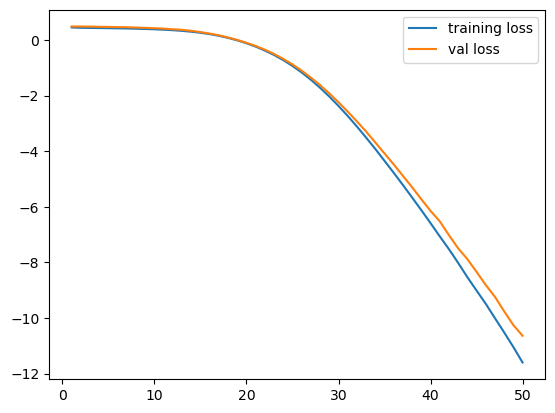

In [78]:
plt.plot(range(1,51),history.history['loss'],label='training loss')
plt.plot(range(1,51),history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

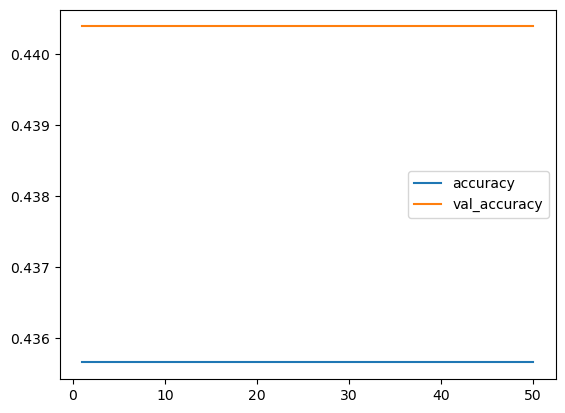

In [79]:
plt.plot(range(1,51),history.history['accuracy'],label='accuracy')
plt.plot(range(1,51),history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

## 30 Aug

In [62]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,CSVLogger,LearningRateScheduler

In [28]:
sd = pd.read_csv(r"C:\Users\pc\Downloads\student_performance.csv")

In [29]:
sd

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [50]:
def marks(x):
    if x>=90:
        return 3
    elif x>70 and x<=89:
        return 2
    elif x>50 and x<=69:
        return 1
    else:
        return 0

In [51]:
sd['FinalGrade'] = sd['FinalGrade'].apply(marks)

In [52]:
fv = sd.iloc[:,3:8]
cv = sd.iloc[:,-1]

In [53]:
fv["ParentalSupport"] = fv['ParentalSupport'].map({"High":2,"Medium":1,"Low":0})

In [54]:
model=Sequential()
model.add(InputLayer(input_shape=(5,)))
model.add(Dense(15,activation="tanh"))
model.add(Dense(10,activation="tanh"))
model.add(Dense(2,activation="tanh"))
model.add(Dense(4,activation="softmax"))

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [55]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

## How to apply checkpoints

In [56]:
mo=ModelCheckpoint("/content/best_model{epoch:02d}{val_loss:.2f}.keras",
               monitor="val_loss",
               verbose=1,
               save_best_only=False,)

In [57]:
hist=model.fit(fv,cv,validation_split=0.1,epochs=20,batch_size=10,callbacks=[mo])

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.0000e+00 - loss: 2.0162
Epoch 1: saving model to /content/best_model012.18.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.0162 - val_accuracy: 0.0000e+00 - val_loss: 2.1835
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0000e+00 - loss: 1.8445
Epoch 2: saving model to /content/best_model022.05.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.0000e+00 - loss: 1.8445 - val_accuracy: 0.0000e+00 - val_loss: 2.0456
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0000e+00 - loss: 1.7627
Epoch 3: saving model to /content/best_model031.90.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.0000e+00 - loss: 1.7627 - val_accuracy: 0.0000e+00 - val_loss: 1.8996
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 1.6777
Epoch 4: saving model to /content/best_model041.75.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.0000

In [59]:
cs=CSVLogger("/content/Logger.csv")

In [60]:
hist=model.fit(fv,cv,validation_split=0.1,epochs=20,batch_size=10,callbacks=[mo,cs])

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5556 - loss: 1.1225
Epoch 1: saving model to /content/best_model010.71.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.5556 - loss: 1.1225 - val_accuracy: 1.0000 - val_loss: 0.7064
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5556 - loss: 1.1190
Epoch 2: saving model to /content/best_model020.69.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5556 - loss: 1.1190 - val_accuracy: 1.0000 - val_loss: 0.6944
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5556 - loss: 1.1161
Epoch 3: saving model to /content/best_model030.68.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.5556 - loss: 1.1161 - val_accuracy: 1.0000 - val_loss: 0.6837
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5556 - loss: 1.1135
Epoch 4: saving model to /content/best_model040.67.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5556 - loss: 1.1135 - val_accuracy: 1.0000

In [61]:
pd.read_csv("/content/Logger.csv")

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.555556,1.122492,1.0,0.706428
1,1,0.555556,1.119043,1.0,0.694425
2,2,0.555556,1.116072,1.0,0.683673
3,3,0.555556,1.113489,1.0,0.673991
4,4,0.555556,1.111227,1.0,0.665232
5,5,0.555556,1.109230,1.0,0.657276
6,6,0.555556,1.107456,1.0,0.650020
7,7,0.555556,1.105869,1.0,0.643380
8,8,0.555556,1.104441,1.0,0.637284
9,9,0.555556,1.103148,1.0,0.631670


In [76]:
def f1(epochs,lr):
    if epochs <= 2:
        return lr
    else:
        return (lr*np.exp(-0.1))

In [84]:
lr=LearningRateScheduler(f1,verbose=1)

In [78]:
from keras.optimizers import SGD

In [79]:
SGD(learning_rate=0.1)

In [83]:
model.compile(optimizer=SGD(learning_rate=0.1),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [85]:
hist=model.fit(fv,cv,validation_split=0.1,epochs=20,batch_size=10,callbacks=[mo,cs,lr])


Epoch 1: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.5556 - loss: 1.0940
Epoch 1: saving model to /content/best_model010.57.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 1.0940 - val_accuracy: 1.0000 - val_loss: 0.5689 - learning_rate: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5556 - loss: 1.0890
Epoch 2: saving model to /content/best_model020.56.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.5556 - loss: 1.0890 - val_accuracy: 1.0000 - val_loss: 0.5566 - learning_rate: 0.1000

Epoch 3: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5556 - loss: 1.0854
Epoch 3: saving model to /content/best_model030.55.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.5556 - loss: 1.08